In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df=df.drop('CustomerID',axis=1)

In [6]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

label=LabelEncoder()
df["Genre"] = label.fit_transform(df["Genre"])

In [8]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [26]:
#k-means clustering

data = df.copy()
x = df.iloc[:,3:]

#importing Kmean model
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    # appending the WCSS to the list 
    #(kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print('k:',i ,"-> wcss:",kmeans.inertia_)

k: 1 -> wcss: 132703.99999999988
k: 2 -> wcss: 45855.747342848495
k: 3 -> wcss: 13929.29359151892
k: 4 -> wcss: 8868.149197258317
k: 5 -> wcss: 5144.980746254944
k: 6 -> wcss: 3460.7606524994544
k: 7 -> wcss: 2963.1036380563573
k: 8 -> wcss: 2001.5801999938542
k: 9 -> wcss: 1567.8779142355224
k: 10 -> wcss: 1383.3000333301964


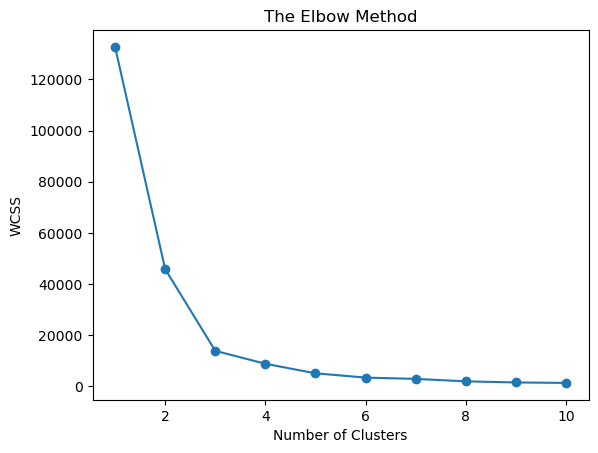

In [27]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [38]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(data)
#predicting the labels of the input data
y=km1.predict(data)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,3
1,1,21,15,81,1
2,0,20,16,6,3
3,0,23,16,77,1
4,0,31,17,40,3


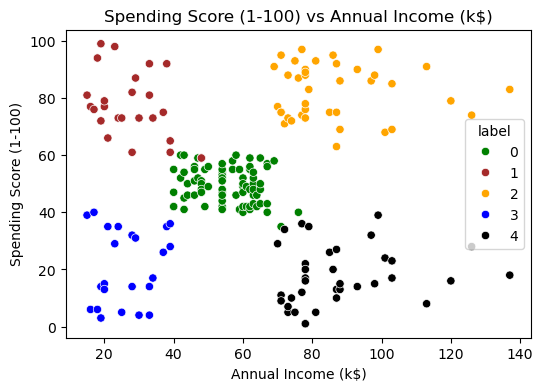

In [39]:
#Scatterplot of the clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','brown','orange','blue','black'],data = data )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


In [46]:
X=data.iloc[:,:4]
y=data.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Shape of train Test Split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(150, 4) (150,)
(50, 4) (50,)


In [49]:
km=KMeans(n_clusters=5)
km.fit(X_train)

#predicting the target value from the model for the samples
y_train_km = km.predict(X_train)
y_test_km = km.predict(X_test)

In [51]:
from sklearn.metrics.cluster import adjusted_rand_score

acc_train_gmm = adjusted_rand_score(y_train,y_train_km)
acc_test_gmm = adjusted_rand_score(y_test,y_test_km)

print("K mean : Accuracy on training Data: {:.3f}".format(acc_train_gmm))
print("K mean : Accuracy on test Data: {:.3f}".format(acc_test_gmm))

K mean : Accuracy on training Data: 0.961
K mean : Accuracy on test Data: 0.828


In [52]:
#heirarchical clustering
data = df.copy()
data = data.iloc[:,[2,3]]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


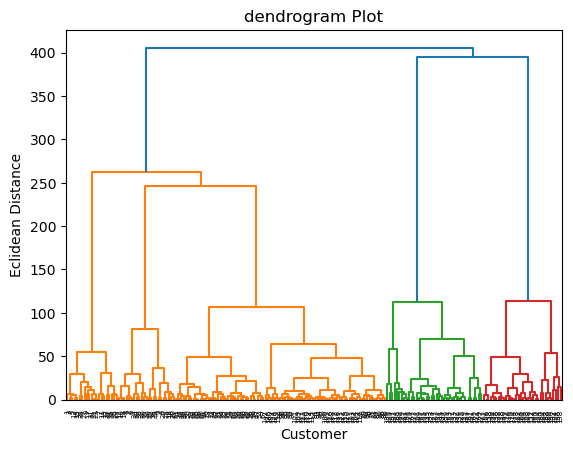

In [55]:
import scipy.cluster.hierarchy as shc
dendrogram = shc.dendrogram(shc.linkage(data,method="ward"))
plt.title("dendrogram Plot")
plt.xlabel("Customer")
plt.ylabel("Eclidean Distance")
plt.grid(False)

In [56]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5)
data["label"] = agc.fit_predict(data)
data


,Annual Income (k$),Spending Score (1-100),label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


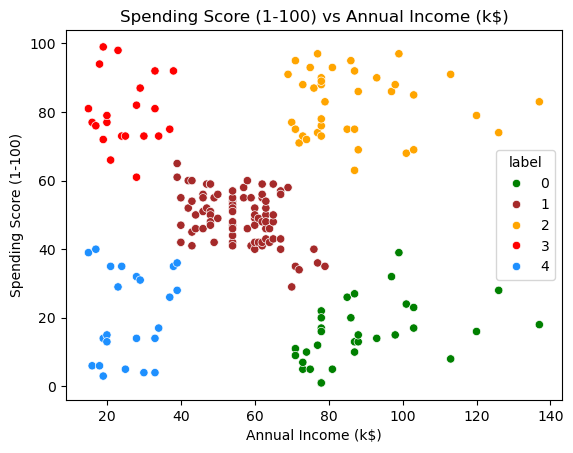

In [57]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','brown','orange','red','dodgerblue'],data = data )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()